In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

c:\Users\wifi\Desktop\Depi_Amit_BNS3\Depi_Amit_AI_BNS3\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.56k/8.56k [00:00<00:00, 2.93MB/s]

Extracting files...
Path to dataset files: C:\Users\wifi\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


In [6]:
import pandas as pd  # for dataframe 
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization
from IPython.display import display


In [2]:
import os 
print(os.listdir(path))

['heart.csv']


In [7]:
df=pd.read_csv(os.path.join(path, 'heart.csv'))
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


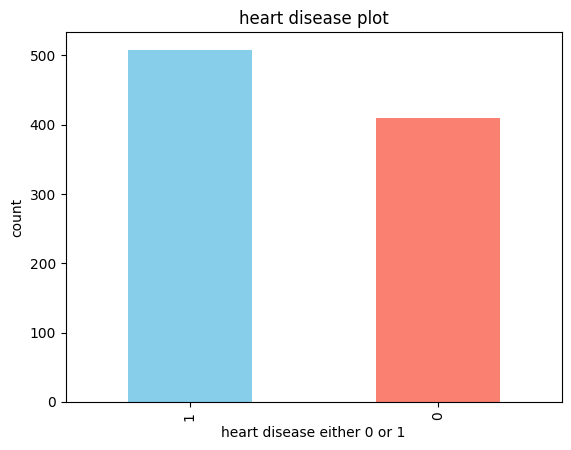

In [8]:
df ['HeartDisease'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title("heart disease plot")
plt.xlabel("heart disease either 0 or 1")
plt.ylabel("count")
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
categorical_features=df.select_dtypes(include=['object','category']).columns.to_list() 
if 'HeartDiseas' in categorical_features:
    categorical_features.remove('HeartDiseas')
df_encoded=pd.get_dummies(df[categorical_features])

In [13]:
df_encoded

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [14]:
from sklearn.feature_selection import chi2
chi2_scores, p_values = chi2(df_encoded, df['HeartDisease'])
chi2_results = pd.DataFrame({'Feature': df_encoded.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values}).sort_values(by='p-value')
display(chi2_results)

,Feature,Chi2 Score,p-value
13,ST_Slope_Up,202.447182,6.106858e-46
12,ST_Slope_Flat,140.635329,1.933233e-32
10,ExerciseAngina_Y,133.640134,6.549289e-31
3,ChestPainType_ATA,120.349494,5.304212e-28
2,ChestPainType_ASY,112.672269,2.545580e-26
9,ExerciseAngina_N,90.640749,1.722756e-21
0,Sex_F,67.640033,1.962423e-16
4,ChestPainType_NAP,32.427756,1.237068e-08
1,Sex_M,18.006243,2.201817e-05
11,ST_Slope_Down,12.835932,3.400260e-04


C:\Users\wifi\AppData\Local\Temp\ipykernel_5576\1143397338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results, palette='viridis')


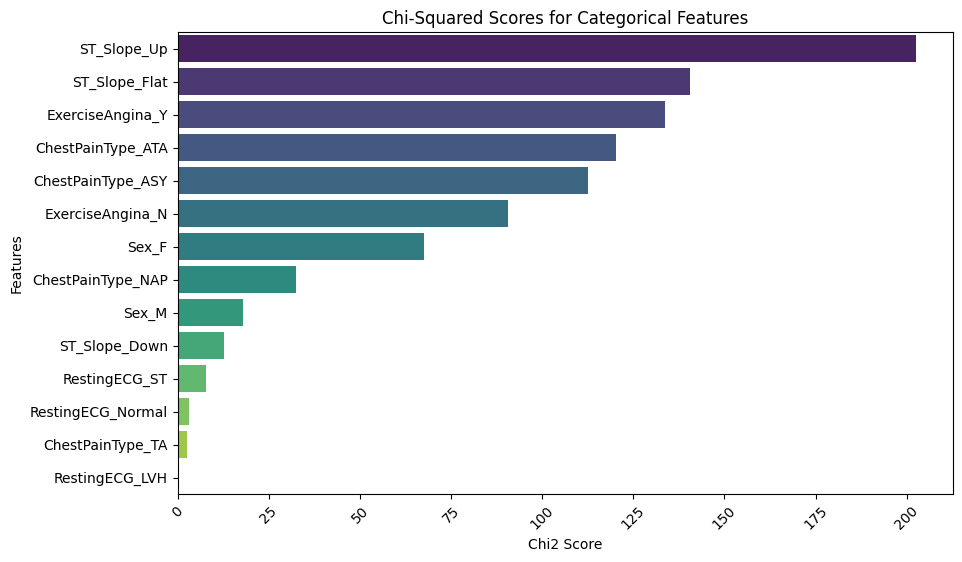

In [25]:
plt.figure(figsize=(10,6))
# use the actual column name from chi2_results ('Chi2 Score')
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_results, palette='viridis')
plt.title('Chi-Squared Scores for Categorical Features')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
numeric_features=df.select_dtypes(include=['int64','float64']).columns.to_list()
if 'HeartDisease' in numeric_features:
    numeric_features.remove('HeartDisease')
scaler = MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features)
df_scaled['HeartDisease']=df['HeartDisease'].values

In [27]:
df_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0
...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1


In [29]:
correlation=df_scaled.corr(method='pearson')['HeartDisease'].sort_values(ascending=False)
print(correlation)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


C:\Users\wifi\AppData\Local\Temp\ipykernel_5576\2662565809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


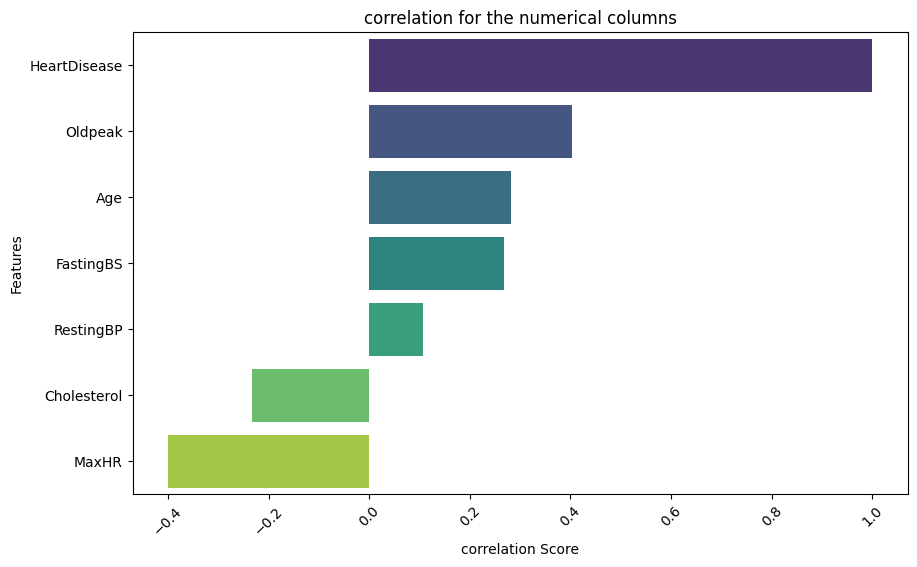

In [30]:
plt.figure(figsize=(10,6))
# use the actual column name from chi2_results ('Chi2 Score')
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('correlation for the numerical columns')
plt.xlabel('correlation Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()

In [39]:
num_features = ["Oldpeak", "Age", "FastingBS", "RestingBP", "Cholesterol", "MaxHR"]
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)

cat_features = [
    "ST_Slope_Up",
    "ST_Slope_Flat",
    "ExerciseAngina_Y",
    "ChestPainType_ATA",
    "ChestPainType_ASY",
    "ExerciseAngina_N",
    "Sex_F",
    "ChestPainType_NAP",
    "Sex_M"
]

X_cat = df_encoded[cat_features]

# --- Combine ---
X = pd.concat([X_num, X_cat], axis=1)

# --- Target ---
y = df["HeartDisease"]

print("Final X shape:", X.shape)

Final X shape: (918, 15)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
Log_reg=LogisticRegression(max_iter=4000 , solver = 'liblinear')
Log_reg.fit(X_train,y_train)
y_pred=Log_reg.predict(X_test)

In [46]:
train_accuracy=accuracy_score(y_train,Log_reg.predict(X_train))
test_accuracy=accuracy_score(y_test,y_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.8489
Test Accuracy: 0.8804


Classification Report:


,precision,recall,f1-score,support
0,0.875,0.854,0.864,123
1,0.885,0.902,0.893,153
accuracy,0.880,0.880,0.880,0
macro avg,0.880,0.878,0.879,276
weighted avg,0.880,0.880,0.880,276



Confusion Matrix (counts):


,Predicted 0,Predicted 1
Actual 0,105,18
Actual 1,15,138


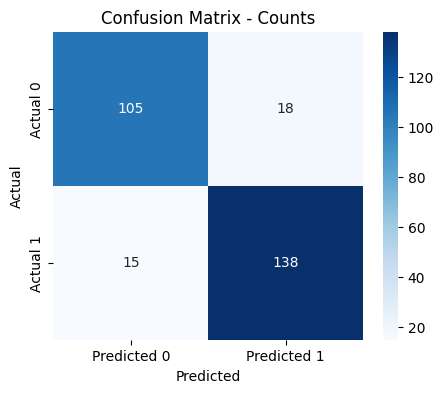

Confusion Matrix (normalized by actual):


,Predicted 0,Predicted 1
Actual 0,0.854,0.146
Actual 1,0.098,0.902


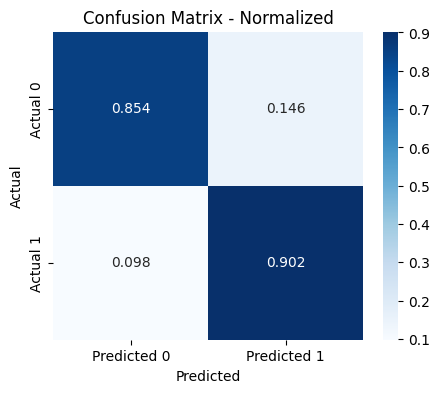

Accuracy: 0.8804


In [50]:
# Organized classification report and confusion matrix visualization
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
# nicer formatting
for col in ['precision', 'recall', 'f1-score']:
    if col in report_df.columns:
        report_df[col] = report_df[col].round(3)
if 'support' in report_df.columns:
    report_df['support'] = report_df['support'].astype(int)

print("Classification Report:")
display(report_df)

# Confusion matrix as DataFrame
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix (counts):")
display(cm_df)

# Plot counts heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Counts')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Normalized by actual class (recall per class)
cm_norm = cm.astype(float) / cm.sum(axis=1)[:, None]
cmn_df = pd.DataFrame(cm_norm.round(3), index=cm_df.index, columns=cm_df.columns)

print("Confusion Matrix (normalized by actual):")
display(cmn_df)

plt.figure(figsize=(5,4))
sns.heatmap(cmn_df, annot=True, fmt='.3f', cmap='Blues')
plt.title('Confusion Matrix - Normalized')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Summary metrics
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
